In [60]:
#pip install --upgrade tensorflow

In [70]:
from tensorflow.keras.models import load_model
model = load_model('/content/model (2).h5')
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1000)                │       3,073,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 800)                 │         800,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 600)                 │         480,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 400)                 │         240,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,594,800 (17.53 MB)

 Trainable params: 4,594,800 (17.53 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
X_finetune = np.load('/content/finetune_imgs.npy')
y_finetune = np.load('/content/finetune_lbls.npy')
X_valid = np.load('/content/valid_imgs.npy')
y_valid = np.load('/content/valid_lbls.npy')
X_test = np.load('/content/test_imgs.npy')
y_test = np.load('/content/test_lbls.npy')
print(X_finetune.shape, y_finetune.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(5000, 32, 32, 3) (5000, 1)
(5000, 32, 32, 3) (5000, 1)
(10000, 32, 32, 3) (10000, 1)


In [72]:
import sklearn
from sklearn.manifold import TSNE
print(f"""
LAYER 1: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 3*32*32)))[0], y_test)},
LAYER 2: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 3*32*32)))[1], y_test)},
LAYER 3: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 3*32*32)))[2], y_test)},
LAYER 4: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 3*32*32)))[3], y_test)}
      """)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LAYER 1: 13.939290285121475,
LAYER 2: 13.011553065196733,
LAYER 3: 13.136080871596505,
LAYER 4: 13.411823243834782
      


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
from keras.models import Model
from keras.layers import Dense

num_classes = 100
dropout = keras.layers.Dropout(0.5)(model.output[3])
softmax_layer = Dense(num_classes, activation='softmax', name='softmax_layer')(dropout)
final_model = Model(inputs=model.input, outputs=softmax_layer)
final_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1000)                │       3,073,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 800)                 │         800,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 600)                 │         480,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 400)                 │         240,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_layer (Dense)                │ (None, 100)                 │          40,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,634,900 (17.68 MB)

 Trainable params: 4,634,900 (17.68 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
final_model.layers[0].trainable = True
final_model.layers[1].trainable = True
final_model.layers[2].trainable = True
final_model.layers[3].trainable = True
final_model.layers[4].trainable = True
for layer in final_model.layers:
    print(f"Layer Name: {layer.name}, Trainable: {layer.trainable}")

Layer Name: input_layer_7, Trainable: True
Layer Name: dense_28, Trainable: True
Layer Name: dense_29, Trainable: True
Layer Name: dense_30, Trainable: True
Layer Name: dense_31, Trainable: True
Layer Name: dropout_7, Trainable: True
Layer Name: softmax_layer, Trainable: True


In [75]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=50,
    decay_rate=0.95,
    staircase=False)

final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])
#final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
selected_samples = X_finetune.reshape((-1, 3*32*32))
selected_labels = tf.keras.utils.to_categorical(y_finetune, num_classes=100)

In [77]:
images_valid = X_valid.reshape((-1, 3*32*32))
labels_valid = tf.keras.utils.to_categorical(y_valid, num_classes=100)

In [78]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
history_finetune = final_model.fit(
    selected_samples[:2500],
    selected_labels[:2500],
    epochs=200,
    batch_size=128,
    validation_data=(images_valid, labels_valid),
    #callbacks=[early_stopping]
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.0103 - loss: 358.8985 - val_accuracy: 0.0102 - val_loss: 331.1447
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0119 - loss: 327.7799 - val_accuracy: 0.0190 - val_loss: 310.7784
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0217 - loss: 307.8293 - val_accuracy: 0.0180 - val_loss: 292.7228
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0158 - loss: 289.9975 - val_accuracy: 0.0266 - val_loss: 276.2579
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0222 - loss: 273.7845 - val_accuracy: 0.0246 - val_loss: 261.1934
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0193 - loss: 258.8507 - val_accuracy: 0.0300 - val_loss: 247.3120
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0346 - loss: 245.2177 - val_accuracy: 0.0380 - val_loss: 234.7345
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0338 - los

In [79]:
y_test_selected = tf.keras.utils.to_categorical(y_test, num_classes=100)
print(final_model.evaluate(X_test.reshape((-1, 3*32*32)), y_test_selected))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1203 - loss: 39.1443
[39.17097473144531, 0.11969999969005585]


In [80]:
val_acc_finetune = history_finetune.history['val_accuracy']

number of epochs:200


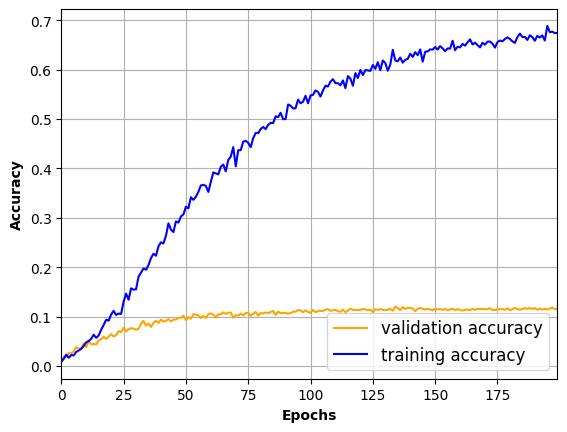

In [81]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_accuracy'], color = 'orange', label = 'validation accuracy')
plt.plot(np.arange(0,epochs), history_finetune.history['accuracy'], color = 'blue', label = 'training accuracy')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)

number of epochs:200


Exception ignored in: <function _xla_gc_callback at 0x79adcb1827a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


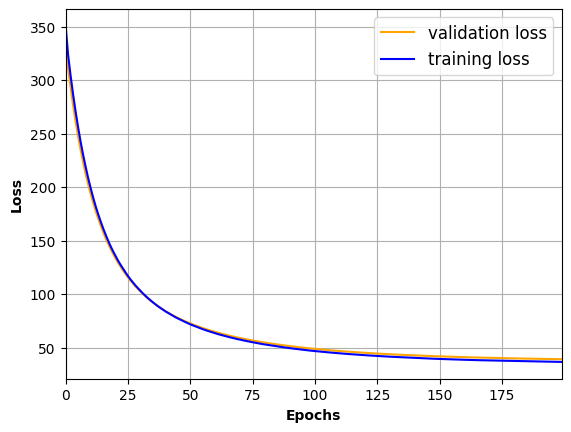

In [82]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_loss'], color = 'orange', label = 'validation loss')
plt.plot(np.arange(0,epochs), history_finetune.history['loss'], color = 'blue', label = 'training loss')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Loss', fontweight = 'bold')
plt.grid()
plt.legend(loc='upper right', fontsize=12)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


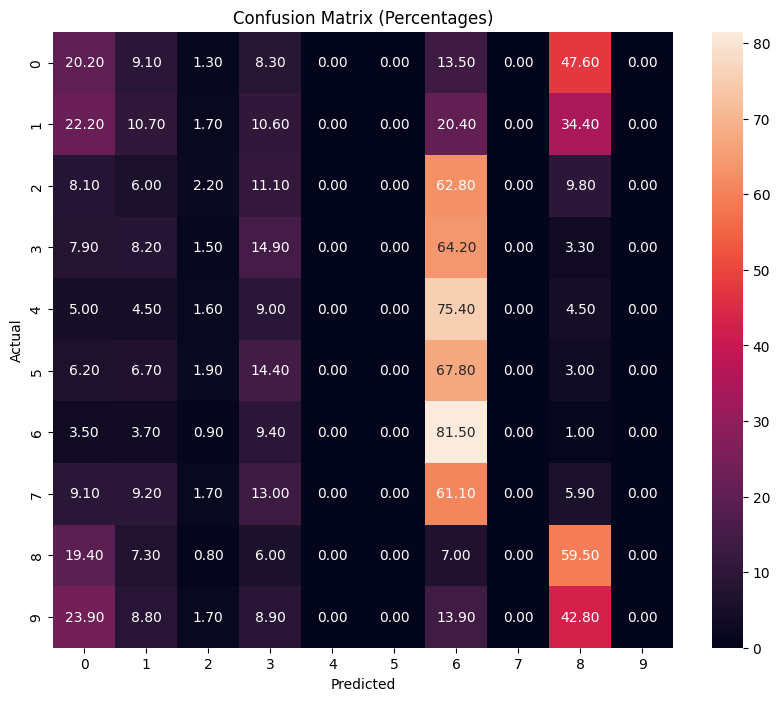

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logits = final_model.predict(X_test.reshape((-1, 3*32*32)))
predicted_labels = np.argmax(logits, axis=-1)

cf_matrix = confusion_matrix(y_test, predicted_labels)

cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

cf_matrix_percent = cf_matrix_normalized * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix_percent, annot=True, fmt=".2f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test.reshape((-1, 3*32*32)))
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.16      0.20      0.18      1000
           1       0.14      0.11      0.12      1000
           2       0.14      0.02      0.04      1000
           3       0.14      0.15      0.14      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.17      0.81      0.29      1000
           7       0.00      0.00      0.00      1000
           8       0.28      0.59      0.38      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.19     10000
   macro avg       0.10      0.19      0.12     10000
weighted avg       0.10      0.19      0.12     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Baseline

In [83]:
def create_model():
    inputs = keras.layers.Input(shape=(3*32*32,))
    layer1 = keras.layers.Dense(1000, activation='selu',
                                kernel_initializer = 'glorot_uniform' , kernel_regularizer = tf.keras.regularizers.L2(0.1))(inputs)
    layer2 = keras.layers.Dense(800, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer1)
    layer3 = keras.layers.Dense(600, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer2)
    layer4 = keras.layers.Dense(400, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer3)
    model = keras.models.Model(inputs=inputs, outputs=[layer1, layer2, layer3, layer4])
    return model

model_ = create_model()

num_classes = 100
dropout = keras.layers.Dropout(0.5)(model_.output[3])
softmax_layer = Dense(num_classes, activation='softmax', name='softmax_layer')(dropout)
final_model = Model(inputs=model_.input, outputs=softmax_layer)
final_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       3,073,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 800)                 │         800,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 600)                 │         480,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 400)                 │         240,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_layer (Dense)                │ (None, 100)                 │          40,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,634,900 (17.68 MB)

 Trainable params: 4,634,900 (17.68 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=50,
    decay_rate=0.95,
    staircase=False)
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
selected_samples = X_finetune.reshape((-1, 3*32*32))
selected_labels = tf.keras.utils.to_categorical(y_finetune, num_classes=100)

In [86]:
images_valid = X_valid.reshape((-1, 3*32*32))
labels_valid = tf.keras.utils.to_categorical(y_valid, num_classes=100)

In [87]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
history_finetune = final_model.fit(
    selected_samples[:2500],
    selected_labels[:2500],
    epochs=200,
    batch_size=128,
    validation_data=(images_valid, labels_valid),
    #callbacks=[early_stopping]
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.0147 - loss: 485.2185 - val_accuracy: 0.0144 - val_loss: 371.6270
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0160 - loss: 374.6752 - val_accuracy: 0.0114 - val_loss: 353.6582
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0099 - loss: 353.6974 - val_accuracy: 0.0120 - val_loss: 343.7780
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0164 - loss: 343.9056 - val_accuracy: 0.0122 - val_loss: 336.4126
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0103 - loss: 336.7083 - val_accuracy: 0.0130 - val_loss: 329.3017
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0117 - loss: 329.5532 - val_accuracy: 0.0120 - val_loss: 322.4209
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0153 - loss: 322.6950 - val_accuracy: 0.0122 - val_loss: 315.7493
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0107 - loss

In [89]:
y_test_selected = tf.keras.utils.to_categorical(y_test, num_classes=100)
print(final_model.evaluate(X_test.reshape((-1, 3*32*32)), y_test_selected))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0704 - loss: 107.0374
[107.04142761230469, 0.07050000131130219]


In [90]:
val_acc_baseline = history_finetune.history['val_accuracy']

number of epochs:200


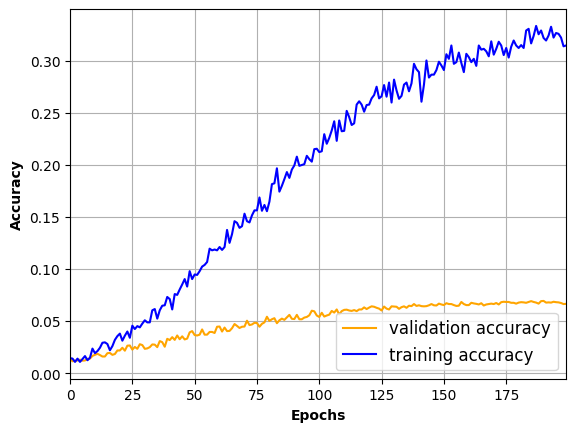

In [91]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_accuracy'], color = 'orange', label = 'validation accuracy')
plt.plot(np.arange(0,epochs), history_finetune.history['accuracy'], color = 'blue', label = 'training accuracy')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)

number of epochs:50


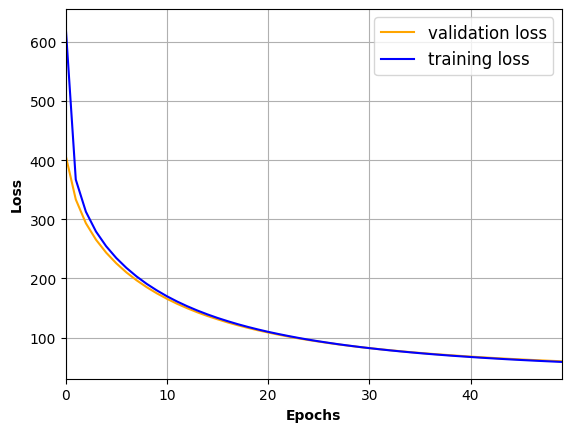

In [ ]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_loss'], color = 'orange', label = 'validation loss')
plt.plot(np.arange(0,epochs), history_finetune.history['loss'], color = 'blue', label = 'training loss')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Loss', fontweight = 'bold')
plt.grid()
plt.legend(loc='upper right', fontsize=12)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


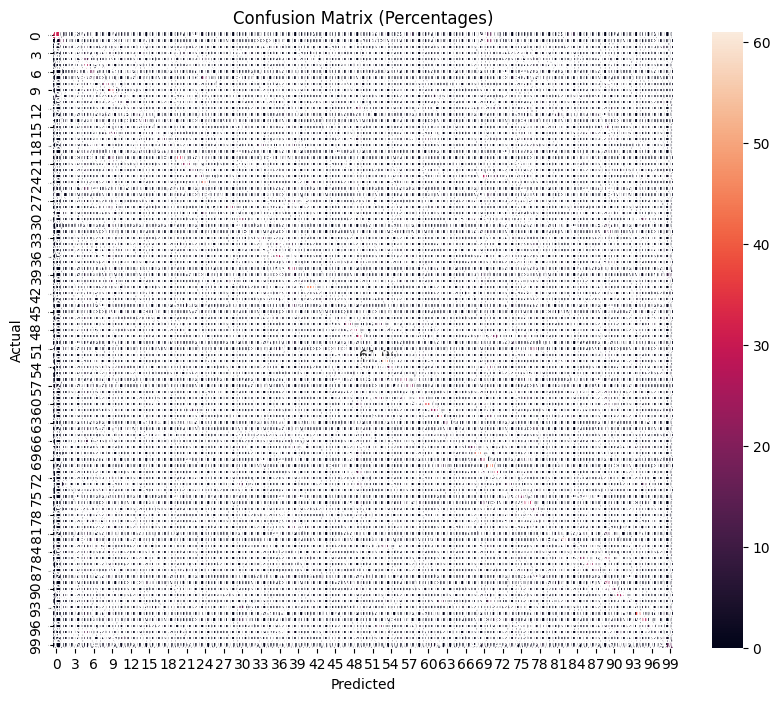

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logits = final_model.predict(X_test.reshape((-1, 3*32*32)))
predicted_labels = np.argmax(logits, axis=-1)

cf_matrix = confusion_matrix(y_test, predicted_labels)

cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

cf_matrix_percent = cf_matrix_normalized * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix_percent, annot=True, fmt=".2f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test.reshape((-1, 3*32*32)))
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.42      0.31      0.36       100
           1       0.22      0.17      0.19       100
           2       0.07      0.06      0.07       100
           3       0.00      0.00      0.00       100
           4       0.09      0.04      0.06       100
           5       0.07      0.26      0.11       100
           6       0.15      0.17      0.16       100
           7       0.08      0.06      0.07       100
           8       0.14      0.22      0.17       100
           9       0.09      0.33      0.15       100
          10       0.08      0.04      0.05       100
          11       0.06      0.08      0.07       100
          12       0.31      0.05      0.09       100
          13       0.12      0.09      0.10       100
          14       0.12      0.13      0.13       100
          15       0.05      0.05      0.05       100
          16       0.08      0.07      

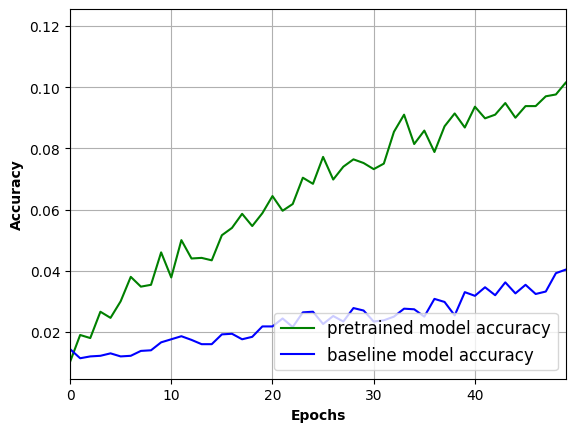

In [93]:
plt.plot(np.arange(0,200), val_acc_finetune, color = 'green', label = 'pretrained model accuracy')
plt.plot(np.arange(0,200), val_acc_baseline, color = 'blue', label = 'baseline model accuracy')
plt.xlim(0, 50 - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)